In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
path = r'train_data_npo'
print(os.listdir(path))

['npo_cntrbtrs.csv', '.DS_Store', 'readme.md', 'npo_trnsctns.csv', 'npo_clnts.csv']


In [3]:
npo_clients = pd.read_csv(path + r'/npo_clnts.csv')
npo_trnsctns = pd.read_csv(path + r'/npo_trnsctns.csv')
npo_cntrbtrs = pd.read_csv(path + r'/npo_cntrbtrs.csv')

In [4]:
npo_clients.shape, npo_trnsctns.shape, npo_cntrbtrs.shape

((230446, 7), (12325096, 5), (248947, 12))

In [5]:
npo_clients.clnt_id.nunique(), npo_trnsctns.npo_accnt_id.nunique(), npo_cntrbtrs.clnt_id.nunique()

(230407, 241359, 230426)

In [6]:
npo_trnsctns.keys()

Index(['npo_accnt_id', 'npo_sum', 'slctn_nmbr', 'npo_operation_date',
       'npo_operation_group'],
      dtype='object')

In [7]:
npo_clients = npo_clients.drop_duplicates(subset='clnt_id')
npo_cntrbtrs = npo_cntrbtrs.drop_duplicates(subset='clnt_id')

In [8]:
npo_clients.shape, npo_cntrbtrs.shape

((230407, 7), (230426, 12))

In [9]:
npo_clients[~npo_clients.clnt_id.isin(npo_cntrbtrs.clnt_id)].shape[0]

0

In [10]:
npo_trnsctns.npo_operation_group.value_counts()

0    9711822
1    2613274
Name: npo_operation_group, dtype: int64

In [11]:
npo_trnsctns.npo_operation_date = pd.to_datetime(npo_trnsctns.npo_operation_date)

In [15]:
npo_trnsctns = npo_trnsctns[npo_trnsctns.npo_operation_group == 0]
npo_trnsctns.npo_operation_group.value_counts()

0    9711822
Name: npo_operation_group, dtype: int64

In [28]:
npo_trnsctns[npo_trnsctns.npo_sum < 0]['npo_sum'].abs().describe()

count    3.666400e+05
mean     7.712137e+01
std      1.226510e+04
min      1.000000e-02
25%      7.650000e+00
50%      1.493500e+01
75%      3.659000e+01
max      6.956180e+06
Name: npo_sum, dtype: float64

In [29]:
npo_trnsctns[npo_trnsctns.npo_sum > 0]['npo_sum'].describe()

count    9.329532e+06
mean     4.294357e+03
std      2.926236e+06
min      1.000000e-02
25%      2.439000e+02
50%      8.130000e+02
75%      2.011650e+03
max      8.584059e+09
Name: npo_sum, dtype: float64

In [52]:
npo_trnsctns[npo_trnsctns.npo_sum == 0]

,npo_accnt_id,npo_sum,slctn_nmbr,npo_operation_date,npo_operation_group
2741,0x6CD8CDFA8C119147A4676C83463889DD,-0.0,2,2013-12-13,0
7894,0x3E94DB8E35FB5246BDABD6224EE3AD29,-0.0,2,2012-04-15,0
7913,0x3E94DB8E35FB5246BDABD6224EE3AD29,-0.0,2,2013-08-16,0
7956,0x275AAEF6A5BD134F9F707E60A0718135,-0.0,2,2014-09-14,0
8010,0x275AAEF6A5BD134F9F707E60A0718135,-0.0,2,2014-04-12,0
...,...,...,...,...,...
12315569,0x19C2FCD7D1B72E4BB03EE2E2CAC812A0,-0.0,2,2012-10-11,0
12323751,0x7B15DFB22B75D94A93A40C48C5433392,-0.0,0,2012-12-16,0
12324327,0x54546887C9F566408AC4715E4E2D49BE,-0.0,2,2009-09-28,0
12324720,0xD327237A2AF5474D84E7B4B3E6763015,-0.0,0,2011-06-09,0


In [50]:
npo_trnsctns[npo_trnsctns.npo_sum < 0]['npo_sum'].shape[0] / npo_trnsctns[npo_trnsctns.npo_sum]['npo_sum'].shape[0]

KeyError: "None of [Float64Index([ 1626.01,  1626.01,  1626.01,  1626.01,  1626.01,  1626.01,\n               1626.01,  1626.01,  1626.01,  1626.01,\n              ...\n               6783.74,  4901.59,  1173.27, 25263.22,  1626.01,     81.3,\n                5038.7,  1945.85,  6189.23,  3375.78],\n             dtype='float64', length=9711822)] are in the [columns]"

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

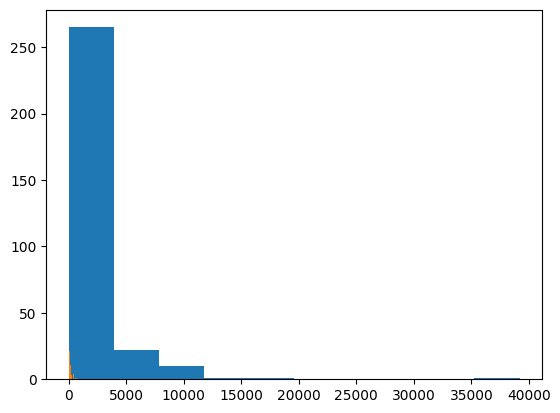

In [63]:
plt.hist(npo_trnsctns[npo_trnsctns.npo_sum > 0]['npo_sum'].abs().sample(300))
plt.hist(npo_trnsctns[npo_trnsctns.npo_sum < 0]['npo_sum'].abs().sample(300))
plt.show()

In [40]:
d = npo_trnsctns.groupby(['npo_accnt_id', npo_trnsctns['npo_operation_date'].dt.to_period('Q')]).agg({'slctn_nmbr' : 'count', 'npo_sum':'sum'}).reset_index()

In [18]:
d = d.rename(columns={'count':'COUNT', 'npo_sum':'SUM'})

In [67]:
d.target

AttributeError: 'DataFrame' object has no attribute 'target'

In [ ]:
d

In [33]:
# d.to_feather(r'./npo_trnsctns_with_target.frt')

In [39]:
import matplotlib.pyplot as plt

In [47]:
d.groupby('npo_operation_date').agg({'SUM':'max'}).reset_index()

,npo_operation_date,SUM
0,1993Q1,112.972067
1,1993Q2,146.103513
2,1993Q3,146.669804
3,1993Q4,169.333497
4,1994Q1,198.030727
...,...,...
113,2021Q2,13175.294367
114,2021Q3,9907.425179
115,2021Q4,9988.651250
116,2022Q1,3984.050973


In [52]:
import seaborn as sns

In [62]:
d

,npo_accnt_id,npo_operation_date,COUNT,SUM,target
0,0x0000132B2D126446B3E105530BA834B9,2007Q4,3,11170.70,3723.566667
1,0x0000132B2D126446B3E105530BA834B9,2008Q1,3,10524.92,3508.306667
2,0x0000132B2D126446B3E105530BA834B9,2008Q2,3,7063.38,2354.460000
3,0x0000132B2D126446B3E105530BA834B9,2008Q3,3,11463.29,3821.096667
4,0x0000132B2D126446B3E105530BA834B9,2008Q4,3,9866.99,3288.996667
...,...,...,...,...,...
3316705,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q1,3,17308.09,5769.363333
3316706,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q2,4,34002.61,8500.652500
3316707,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q3,3,13900.61,4633.536667
3316708,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q4,3,14341.05,4780.350000


In [68]:
d.groupby('npo_operation_date').agg({'target':'mean'}).reset_index()

,npo_operation_date,target
0,1993Q1,98.408576
1,1993Q2,115.627318
2,1993Q3,115.065464
3,1993Q4,130.326090
4,1994Q1,152.606265
...,...,...
113,2021Q2,4332.492140
114,2021Q3,3413.591836
115,2021Q4,3478.196424
116,2022Q1,3457.060255


In [71]:
df.npo_operation_date

0      1993Q1
1      1993Q2
2      1993Q3
3      1993Q4
4      1994Q1
        ...  
113    2021Q2
114    2021Q3
115    2021Q4
116    2022Q1
117    2022Q2
Name: npo_operation_date, Length: 118, dtype: period[Q-DEC]

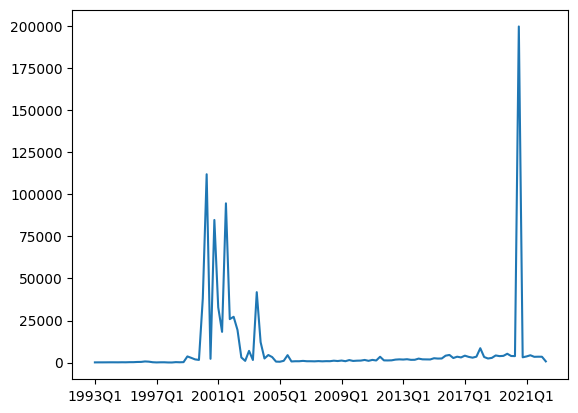

In [85]:
df = d.groupby('npo_operation_date').agg({'target':'mean'}).reset_index()
labels = np.array(df.npo_operation_date.astype(str))
plt.xticks(ticks = range(0,len(labels), 16), labels = labels[::16])
plt.plot(df.target)

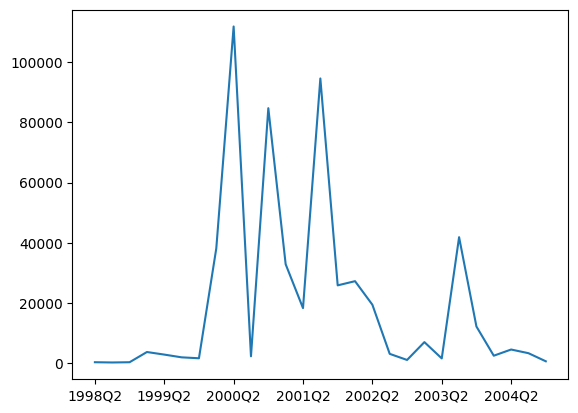

In [100]:
df = d[(d.npo_operation_date > '1998Q1') & (d.npo_operation_date < '2005Q1')]
df = df.groupby('npo_operation_date').agg({'target':'mean'}).reset_index()
labels = np.array(df.npo_operation_date.astype(str))
plt.xticks(ticks = range(0,len(labels), 4), labels = labels[::4])
plt.plot(df.target)

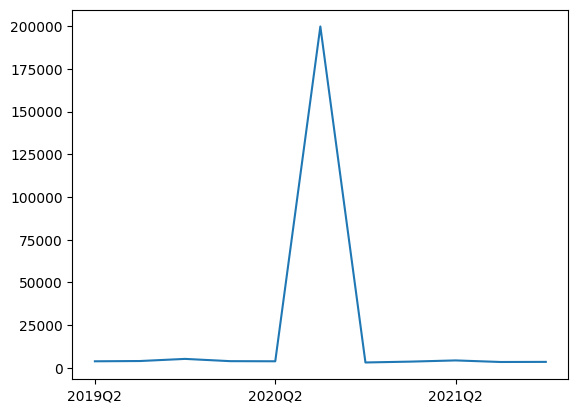

In [102]:
df = d[(d.npo_operation_date > '2019Q1') & (d.npo_operation_date < '2022Q1')]
df = df.groupby('npo_operation_date').agg({'target':'mean'}).reset_index()
labels = np.array(df.npo_operation_date.astype(str))
plt.xticks(ticks = range(0,len(labels), 4), labels = labels[::4])
plt.plot(df.target)

In [113]:
d[(d.npo_operation_date > '1998Q1') & (d.npo_operation_date < '2005Q1')].groupby('npo_accnt_id').agg({'SUM':'sum'}).reset_index().SUM.max()

17721604.8

In [124]:
d[d.SUM == 17721604.8]

,npo_accnt_id,npo_operation_date,COUNT,SUM,target
1012926,0x500DEFBF8F1E1D489D73B92284A8472E,2002Q3,2,17721604.8,8860802.4


In [62]:
npo_clients[npo_clients.clnt_id == '0xEAAB32E1C919964594789ACF95B18229']

,clnt_id,gndr,slctn_nmbr,age,brth_yr,pstl_code,city
36864,0xEAAB32E1C919964594789ACF95B18229,0.0,1,84.0,1939.0,117418.0,1


In [61]:
npo_cntrbtrs[npo_cntrbtrs.npo_accnt_id == '0x500DEFBF8F1E1D489D73B92284A8472E']

,npo_accnt_id,clnt_id,accnt_pnsn_schm,slctn_nmbr,npo_accnt_status,npo_accnt_status_date,npo_blnc,npo_pmnts_sum,npo_pmnts_nmbr,npo_frst_pmnt_date,npo_lst_pmnt_date,npo_ttl_incm
197576,0x500DEFBF8F1E1D489D73B92284A8472E,0xEAAB32E1C919964594789ACF95B18229,32.0,1,0,2021-03-12,NaN,17721604.8,2.0,2002-08-31,2002-09-12,31731959.99


In [131]:
d.SUM.describe(percentiles = [0.05, 0.95])

count    3.316710e+06
mean     1.207102e+04
std      6.087838e+06
min     -2.308037e+06
5%       2.439000e+02
50%      2.439000e+03
95%      1.767614e+04
max      8.584059e+09
Name: SUM, dtype: float64

In [134]:
d[d.SUM < 0].shape[0] / d.shape[0]

0.000470345613574898

In [55]:
npo_cntrbtrs[npo_cntrbtrs.npo_accnt_id == '0x6CD8CDFA8C119147A4676C83463889DD']

,npo_accnt_id,clnt_id,accnt_pnsn_schm,slctn_nmbr,npo_accnt_status,npo_accnt_status_date,npo_blnc,npo_pmnts_sum,npo_pmnts_nmbr,npo_frst_pmnt_date,npo_lst_pmnt_date,npo_ttl_incm
208827,0x6CD8CDFA8C119147A4676C83463889DD,0x836FE7E08FF0C745A38C603AD42D41D0,3.0,2,1,2013-02-02,24111.01,14270.87,11.0,2013-02-02,2014-01-03,9840.13


In [65]:
npo_trnsctns

,npo_accnt_id,npo_sum,slctn_nmbr,npo_operation_date,npo_operation_group
0,0x05C7DF8BA2611640BE946E29CF20C6D2,1626.01,0,2011-11-11,0
2,0x05C7DF8BA2611640BE946E29CF20C6D2,1626.01,0,2007-03-12,0
4,0x05C7DF8BA2611640BE946E29CF20C6D2,1626.01,0,2016-11-05,0
5,0x05C7DF8BA2611640BE946E29CF20C6D2,1626.01,0,2009-06-11,0
6,0x05C7DF8BA2611640BE946E29CF20C6D2,1626.01,0,2012-04-06,0
...,...,...,...,...,...
12325087,0xA62B005056964A2C11EDAEA5ABE1DCC0,81.30,2,2021-10-17,0
12325089,0xA62F005056964A2C11EDFABDF4B3E06D,5038.70,2,2022-01-10,0
12325091,0xA62F005056964A2C11EDF615B8E951D8,1945.85,2,2022-01-09,0
12325094,0xA62F005056964A2C11EDF0C687A20274,6189.23,2,2022-01-09,0


In [68]:
d

,npo_accnt_id,npo_operation_date,slctn_nmbr,npo_sum
0,0x0000132B2D126446B3E105530BA834B9,2007Q4,3,11170.70
1,0x0000132B2D126446B3E105530BA834B9,2008Q1,3,10524.92
2,0x0000132B2D126446B3E105530BA834B9,2008Q2,3,7063.38
3,0x0000132B2D126446B3E105530BA834B9,2008Q3,3,11463.29
4,0x0000132B2D126446B3E105530BA834B9,2008Q4,3,9866.99
...,...,...,...,...
3316705,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q1,3,17308.09
3316706,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q2,4,34002.61
3316707,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q3,3,13900.61
3316708,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q4,3,14341.05


In [69]:
d['target'] = d.npo_sum / d.slctn_nmbr

In [77]:
d[d.target < 0].shape, d[d.target > 0].shape, d[d.target == 0].shape

((1560, 5), (3312353, 5), (2797, 5))

In [76]:
d[d.target > 0].shape

(3312353, 5)

In [80]:
d.npo_operation_date.value_counts().sort_index()

1993Q1     1495
1993Q2     3117
1993Q3     2295
1993Q4     1853
1994Q1     1251
          ...  
2021Q2    43071
2021Q3    43380
2021Q4    44128
2022Q1    40550
2022Q2     3440
Freq: Q-DEC, Name: npo_operation_date, Length: 118, dtype: int64

In [83]:
d = d.rename(columns={'slctn_nmbr':'COUNT', 'npo_sum':'SUM', 'target':'TARGET'})

In [84]:
d

,npo_accnt_id,npo_operation_date,COUNT,SUM,TARGET
0,0x0000132B2D126446B3E105530BA834B9,2007Q4,3,11170.70,3723.566667
1,0x0000132B2D126446B3E105530BA834B9,2008Q1,3,10524.92,3508.306667
2,0x0000132B2D126446B3E105530BA834B9,2008Q2,3,7063.38,2354.460000
3,0x0000132B2D126446B3E105530BA834B9,2008Q3,3,11463.29,3821.096667
4,0x0000132B2D126446B3E105530BA834B9,2008Q4,3,9866.99,3288.996667
...,...,...,...,...,...
3316705,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q1,3,17308.09,5769.363333
3316706,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q2,4,34002.61,8500.652500
3316707,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q3,3,13900.61,4633.536667
3316708,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q4,3,14341.05,4780.350000


In [86]:
d.SUM.describe()

count    3.316710e+06
mean     1.207102e+04
std      6.087838e+06
min     -2.308037e+06
25%      7.317000e+02
50%      2.439000e+03
75%      6.010703e+03
max      8.584059e+09
Name: SUM, dtype: float64

In [88]:
d[d.TARGET < 0].shape, d[d.TARGET > 0].shape, d[d.TARGET == 0].shape

((1560, 5), (3312353, 5), (2797, 5))

In [95]:
d[d.TARGET <= 0].shape[0] / d.TARGET.shape[0]

0.0013136511784268144

In [90]:
d[d.TARGET < 0][d.npo_accnt_id == '0x0007EBCFDCF2E542A6F977245A12E464']

/var/folders/d_/x_4_5nfx3m960gnd3stdgfwh0000gn/T/ipykernel_10932/2097120463.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d[d.TARGET < 0][d.npo_accnt_id == '0x0007EBCFDCF2E542A6F977245A12E464']


,npo_accnt_id,npo_operation_date,COUNT,SUM,TARGET
499,0x0007EBCFDCF2E542A6F977245A12E464,2017Q2,1,-9.88,-9.88


In [92]:
npo_trnsctns[npo_trnsctns.npo_accnt_id == '0x0007EBCFDCF2E542A6F977245A12E464']

,npo_accnt_id,npo_sum,slctn_nmbr,npo_operation_date,npo_operation_group
12298909,0x0007EBCFDCF2E542A6F977245A12E464,16715.44,2,2010-09-16,0
12298910,0x0007EBCFDCF2E542A6F977245A12E464,-9.88,2,2017-05-02,0


In [103]:
f = d[d.TARGET > 0].rename(columns = {'npo_operation_date':'QUARTAL'})

In [104]:
f

,npo_accnt_id,QUARTAL,COUNT,SUM,TARGET
0,0x0000132B2D126446B3E105530BA834B9,2007Q4,3,11170.70,3723.566667
1,0x0000132B2D126446B3E105530BA834B9,2008Q1,3,10524.92,3508.306667
2,0x0000132B2D126446B3E105530BA834B9,2008Q2,3,7063.38,2354.460000
3,0x0000132B2D126446B3E105530BA834B9,2008Q3,3,11463.29,3821.096667
4,0x0000132B2D126446B3E105530BA834B9,2008Q4,3,9866.99,3288.996667
...,...,...,...,...,...
3316705,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q1,3,17308.09,5769.363333
3316706,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q2,4,34002.61,8500.652500
3316707,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q3,3,13900.61,4633.536667
3316708,0xFFFFF59735AAF14E9DABA46C84CAD40B,2021Q4,3,14341.05,4780.350000


In [107]:
f[['npo_accnt_id','QUARTAL','COUNT','TARGET']].reset_index(drop=True).to_feather(r'./target.frt')

In [111]:
f.describe()

,COUNT,SUM,TARGET
count,3.312353e+06,3.312353e+06,3.312353e+06
mean,2.929638e+00,1.208837e+04,4.942080e+03
std,9.110069e-01,6.091840e+06,4.719716e+06
min,1.000000e+00,1.000000e-02,1.000000e-02
25%,3.000000e+00,7.317000e+02,2.556233e+02
50%,3.000000e+00,2.439000e+03,8.246833e+02
75%,3.000000e+00,6.017930e+03,2.061410e+03
max,2.480000e+02,8.584059e+09,8.584059e+09


In [99]:
f.npo_operation_date[0]

Period('2007Q4', 'Q-DEC')

In [112]:
npo_cntrbtrs

,npo_accnt_id,clnt_id,accnt_pnsn_schm,slctn_nmbr,npo_accnt_status,npo_accnt_status_date,npo_blnc,npo_pmnts_sum,npo_pmnts_nmbr,npo_frst_pmnt_date,npo_lst_pmnt_date,npo_ttl_incm
0,0x90B7458B8CBFF24980DEC312BA4A1AF5,0x85390230E8955E4FA736E62B0F0E3844,1.0,0,1,2001-05-14,10158.96,2276.42,1.0,2005-08-31,2005-08-31,5638.83
1,0xC64D3161D31A8441A65224792D370CB3,0xC2B51FD4FE57F7479210FD7258DF5B0B,3.0,2,0,2018-10-30,NaN,230084.40,55.0,2013-03-07,2017-09-10,39875.30
2,0xC92F1AA5587E2348BEF17432FBD6C2E6,0x8EC850934FF06A4AA0A856CF43B8D666,4.0,1,0,2014-01-20,NaN,7921.95,8.0,2012-11-26,2013-06-30,207.50
3,0x8DDD2D186B990F43AD5FC9F5C7124E16,0xAF0A0745F8241548B01C4CDA068C51E8,5.0,0,0,2019-05-30,NaN,8130.08,1.0,2015-08-14,2015-08-14,6866.61
4,0xA7F12C768A4FB38311E835E81716D8CD,0x943D2C768A4FB38311E65C7B0420641F,7.0,3,1,2007-04-16,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
248942,0xBCC44D37FC13140845A0699ED3176332,0x943D2C768A4FB38311E6620FA24FEA7C,89.0,3,1,2022-02-25,813.00,813.00,1.0,2022-02-25,2022-02-25,NaN
248943,0x8120005056AB57EC11EE46637F6FF1F2,0x8120005056AB57EC11EE457B92B38BD8,33.0,0,1,2022-04-28,894.30,894.30,2.0,2022-04-28,2022-04-29,NaN
248944,0x8F61B56D1DD804804FDE77B593B577C5,0x8AC1000C2962068211EE0B7C30706716,89.0,3,1,2022-02-13,406.50,406.50,1.0,2022-02-13,2022-02-13,NaN
248945,0xA4EF00505692D0BC11EE2608583314E2,0x943D2C768A4FB38311E65F808C6C5D73,102.0,3,1,2022-03-18,1626.01,1626.01,2.0,2022-03-18,2022-03-20,NaN


In [115]:
npo_cntrbtrs.clnt_id.nunique() == npo_cntrbtrs.npo_accnt_id.nunique()

True

In [118]:
npo_cntrbtrs.accnt_pnsn_schm.value_counts()

3.0      66961
2.0      33144
1.0      25163
15.0     11052
23.0      6711
         ...  
298.0        1
293.0        1
292.0        1
291.0        1
375.0        1
Name: accnt_pnsn_schm, Length: 353, dtype: int64

In [121]:
npo_cntrbtrs[['npo_accnt_id', 'clnt_id']].reset_index(drop=True).to_feather(r'./mapper_id.frt')

In [123]:
ids = npo_cntrbtrs.npo_accnt_id.sample(1000)

In [124]:
df2 = npo_cntrbtrs[npo_cntrbtrs.npo_accnt_id.isin(ids)]

In [125]:
df3 = npo_trnsctns[npo_trnsctns.npo_accnt_id.isin(ids)]

In [126]:
df1 = npo_clients[npo_clients.clnt_id.isin(df2.clnt_id)]

In [129]:
df1.shape, df2.shape, df3.shape

((1000, 7), (1000, 12), (40845, 5))

In [130]:
df3.merge(df2, on='accnt_id')

KeyError: 'accnt_id'